In [49]:
# Libraries
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Custom functions
import sys
sys.path.append('../src')

# Global variables

nodeinfo_path = '../data/processed/node_info.csv'
ismn_path = '../data/processed/ISMN_dataset.h5'

# ISMN Time Dimension Problem

The main issue when working with the data from ISMN is that the records are not in sync with each other. Ideally we would have a datacube with (Node_name, Timestamp/datetime) dimensions, and those will only be for the year 2017

In [3]:
ismn_dataset = xr.open_dataset(ismn_path)
ismn_dataset

<xarray.Dataset>
Dimensions:       (Node_name: 1369, Register: 96432)
Coordinates:
  * Node_name     (Node_name) object 'ARM\\Anthony' ... 'WSMN\\WSMN-2'
  * Register      (Register) int64 0 1 2 3 4 5 ... 96427 96428 96429 96430 96431
Data variables:
    values        (Node_name, Register) float64 ...
    quality_flag  (Node_name, Register) float64 ...
    timestamp     (Node_name, Register) float64 ...
    2017_mask     (Node_name, Register) bool ...
    lat           (Node_name) float64 ...
    lon           (Node_name) float64 ...
    node_tag      (Node_name) object ...

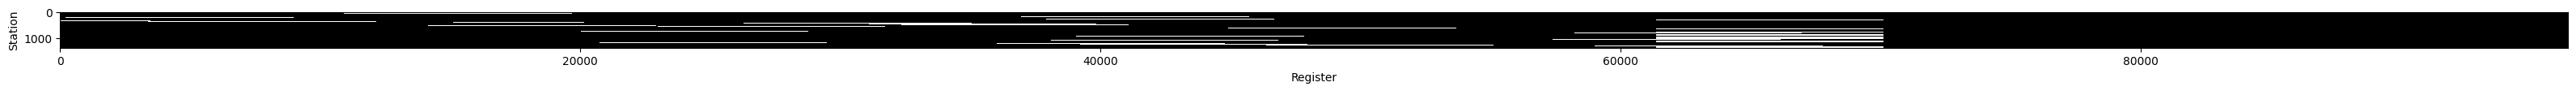

In [23]:
plt.figure(figsize=(40,2))
plt.imshow(ismn_dataset["2017_mask"], cmap='gray', interpolation='nearest')
plt.xlabel('Register')
plt.ylabel('Station')
plt.show()

In [40]:
# Lets create a new dimention, one for each hour in 2017's year and coded as a timestamp

start_2017 = int(datetime(2017,1,1,0,0).timestamp())
end_2017 = int(datetime(2017,12,31,23,0,0).timestamp())

valid_times = [value for value in range(start_2017 + 3600,end_2017,3600)]
print(len(valid_times), valid_times[0], valid_times[-1])

8758 1483228800 1514754000


In [45]:
times = ismn_dataset.where(ismn_dataset["2017_mask"] == True)["timestamp"][200,:]
recorded_times = times[ismn_dataset["2017_mask"][200,:]]

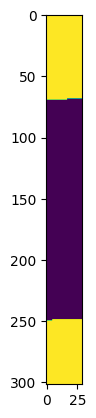

In [55]:
plt.imshow((recorded_times == valid_times).values.reshape(151,29))

In [ ]:
# Lets create the new array row by row, recording the value of the array only where the 2017_mask is True, if the register is incomplete we sould (?)